# Breast Cancer : University of Wisconsin

Will be working on a binary classification use case of machine learning. Here in this workbook, will be working on using a dataset from University of wisconsin, which has published breast cancer diagnostic data from digitized images of breast-mass. Since this is a classification problem, we will be using accuracy as a training metric to develop a machine learning model.

## Amazon Sagemaker

Amazon Sagemaker provides an end-to-end AI/ML platform to build, train, deploy and manage machine learning models in an easy form.  
Sagemaker facilitates wide range of built-in aglorithms to solve common business use cases. 


## Problem statement

This notebook reviews a very well known breast cancer tumor prediction use case. University of wisconsin has published a dataset in a tabular format which was derived from a ultrasound images. Tabular data includes a target variable "Diagnosis" which is labeled as M for malignant and B for beingin. Dataset also includes various features which are explained below which will influence the Diagnosis. 

 
#### Data Set 

Attribute Information:
 - ID number
 - Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:
 - radius (mean of distances from center to points on the perimeter)
 - texture (standard deviation of gray-scale values)
 -  perimeter
 -  area
 -  smoothness (local variation in radius lengths)
 - compactness (perimeter^2 / area - 1.0)
 -  concavity (severity of concave portions of the contour)
 -  concave points (number of concave portions of the contour)
 -  symmetry
 - fractal dimension ("coastline approximation" - 1)


## Solution Approach
In the machine learning arena, this problem is  categorized as typical binary classification. 

Sagemaker provides variety of built-in algorightm for most common use cases. This notebook leverages Linear Learner built-in algorightm from Sagemaker. Next sections will review

 - Exploratory Data Analysis
 - Training a sagemaker model




## Loading the libraries

In [72]:
import os
import boto3
import pandas as pd
import numpy as np
import seaborn as sns
import sagemaker
import matplotlib.pyplot as plt
from sklearn import preprocessing
import sagemaker.amazon.common as smac
from sagemaker.amazon.amazon_estimator import get_image_uri

## Defining Role and Instance

In [23]:
role = 'arn:aws:iam::XXXXXXXXX:role/role_sagemaker'
instance_type='ml.m5.large'

## Read the data and analyze

In [24]:
data = pd.read_csv('data.csv')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

## Drop the column which has zero records

In [26]:
data = data.drop('Unnamed: 32', axis=1)

## Correlation

In [27]:
data_corr = data.corr()

In [28]:
data_corr

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


### Viewing the target variable distributions. Malignant and Benign are some what evenly distributed

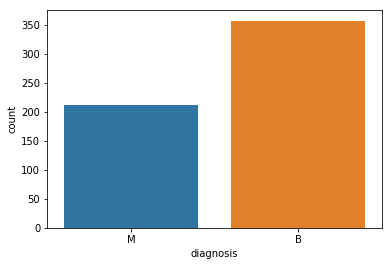

In [31]:
sns.countplot(x='diagnosis', data=data)

### Heatmap for feature correlation

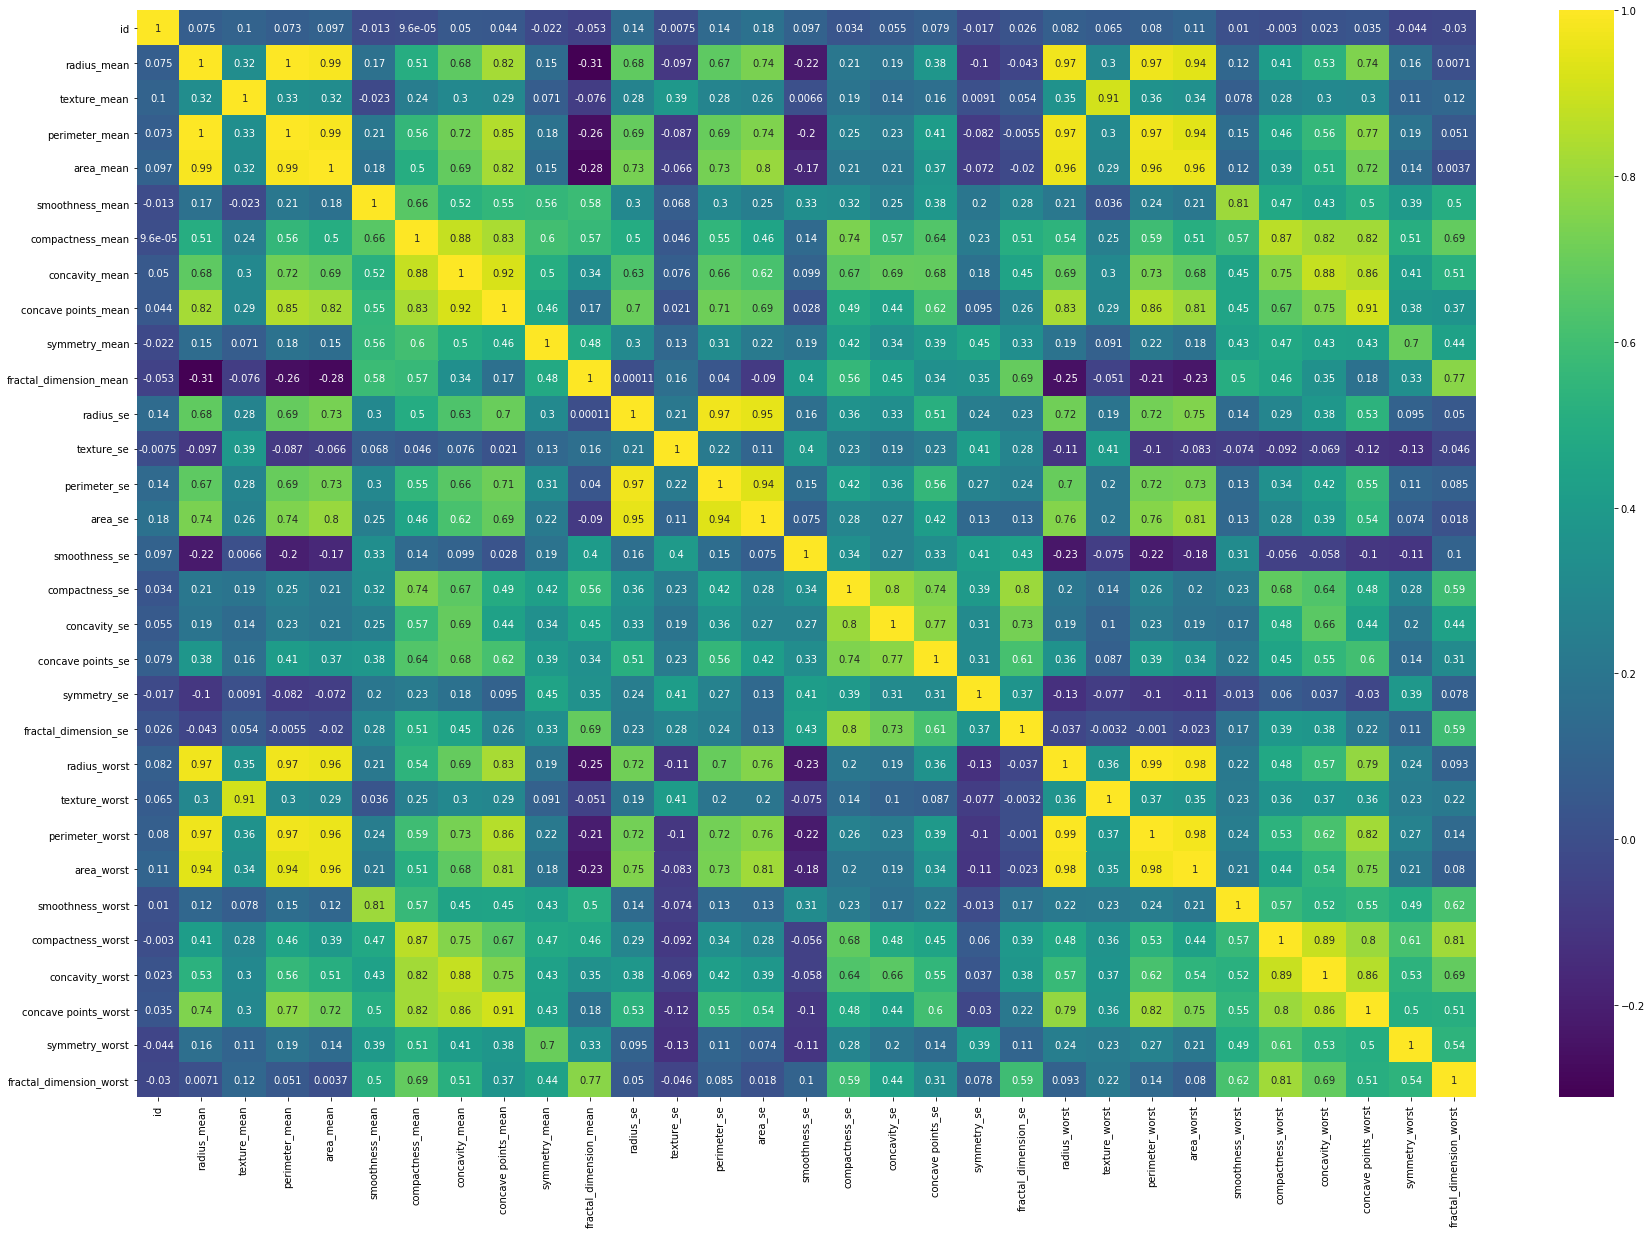

In [32]:
plt.figure(figsize=(30,20))
sns.heatmap(data.corr(),annot=True,cmap='viridis')

## Histogram to check each feature distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12a61b320>,
      dtype=object)

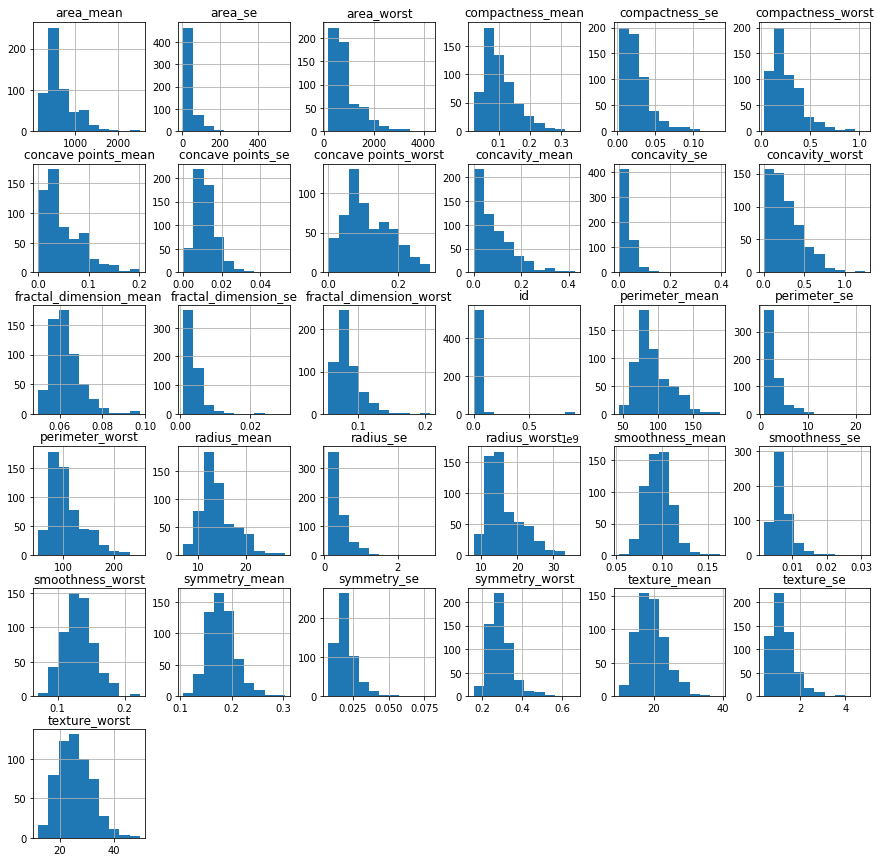

In [33]:
data.hist(figsize=(15,15))

#### Prepping the dataset ready for Linear Learner, since we are using csv as content/type, sagemaker expects the target in the first column

In [34]:
data = data[ ['diagnosis'] + [ col for col in data.columns if col != 'diagnosis' ] ]

In [36]:
data = data.drop('id', axis=1)

#### Target values are stored as M=Malignat & B=Benign, so we would have to convert these labels to numeric values. Hence we are going to use sci-kit label encoder

In [53]:
label_encoder = preprocessing.LabelEncoder() 
data['diagnosis']= label_encoder.fit_transform(data['diagnosis']) 

In [56]:
rand_split = np.random.rand(len(data))
train = rand_split < 0.8
test = rand_split >= 0.8

In [59]:
data_train = data[train]
data_test = data[test]

In [60]:
bucket = 'rrevuru-ml'

In [61]:
import boto3

In [62]:
train_csv = data_train.to_csv('train.csv',header=False,index=False)
test_csv = data_test.to_csv('test.csv', header=False, index=False)

In [63]:
s3 = boto3.client('s3')
with open("train.csv", "rb") as f:
    s3.upload_fileobj(f, bucket, "train.csv")

In [64]:
s3 = boto3.client('s3')
with open("test.csv", "rb") as f:
    s3.upload_fileobj(f, bucket, "test.csv")

In [66]:
train_data = sagemaker.session.s3_input('s3://rrevuru-ml/train.csv', content_type='text/csv')
test_data = sagemaker.session.s3_input('s3://rrevuru-ml/test.csv',content_type='text/csv')

### Creating Sagemaker Linear Learner Estimator

In [67]:
ll_bc_class = sagemaker.estimator.Estimator(get_image_uri(boto3.Session().region_name, "linear-learner"),
                                   role, 
                                   train_instance_count=1,
                                   train_instance_type=instance_type,
                                   sagemaker_session=sagemaker.Session())

ll_bc_class.set_hyperparameters(predictor_type='binary_classifier',
                      mini_batch_size=100,
                      epochs=20)

### Fitting the Linear learner model

In [68]:
ll_bc_class.fit({'train': train_data, 'test': test_data})

2021-01-19 17:00:28 Starting - Starting the training job...
2021-01-19 17:00:30 Starting - Launching requested ML instances......
2021-01-19 17:01:44 Starting - Preparing the instances for training......
2021-01-19 17:02:45 Downloading - Downloading input data...
2021-01-19 17:03:30 Training - Downloading the training image..
2021-01-19 17:04:03 Uploading - Uploading generated training model
2021-01-19 17:04:03 Completed - Training job completed
Docker entrypoint called with argument(s): train
Running default environment configuration script
[01/19/2021 17:03:48 INFO 140407867311936] Reading default configuration from /opt/amazon/lib/python2.7/site-packages/algorithm/resources/default-input.json: {u'loss_insensitivity': u'0.01', u'epochs': u'15', u'feature_dim': u'auto', u'init_bias': u'0.0', u'lr_scheduler_factor': u'auto', u'num_calibration_samples': u'10000000', u'accuracy_top_k': u'3', u'_num_kv_servers': u'auto', u'use_bias': u'true', u'num_point_for_scaler': u'10000', u'_log_leve

Training seconds: 78
Billable seconds: 78


In [69]:
job = 'linear-learner-2021-01-19-17-00-28-048'

In [70]:
result = sagemaker.TrainingJobAnalytics(job).dataframe()

### Here we can compare  accuracy from the train and test

In [71]:
result

,metric_name,timestamp,value
0,train:progress,0.0,60.000000
1,test:binary_f_beta,0.0,0.911111
2,train:objective_loss,0.0,0.241761
3,train:recall,0.0,0.970238
4,train:precision,0.0,0.981928
5,train:objective_loss:final,0.0,0.054650
6,train:binary_f_beta,0.0,0.976048
7,test:recall,0.0,0.931818
8,test:objective_loss,0.0,0.146128
9,test:precision,0.0,0.891304
